In [ ]:
# augumentacja - rozszerzenie albo zmiany w zbiorze
# służą do wyeliminowania przeuczenia

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

EPOCHS = 100

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
from keras.preprocessing.image import ImageDataGenerator

root_path = "flowers/"

gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    validation_split=0.2
)
# dodatkowe parametry które on "może" zrobić po to aby uniknąć przeuczenia.

# Load Data
train_ds = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes = os.listdir(root_path), #klasy nazwij tak, jak nazywają się foldery w folderze flowers
    shuffle=True,
    batch_size=32,
    target_size=(128,128),
    subset="training"
)

valid_ds = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes = os.listdir(root_path),
    shuffle=True,
    batch_size=32,
    target_size=(128,128),
    subset="validation"
)


Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [6]:
classes = os.listdir(root_path) #stwórz listę, w której będą nazwy klas. Stwórz ją na podstawie nazw folderów

In [7]:
classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

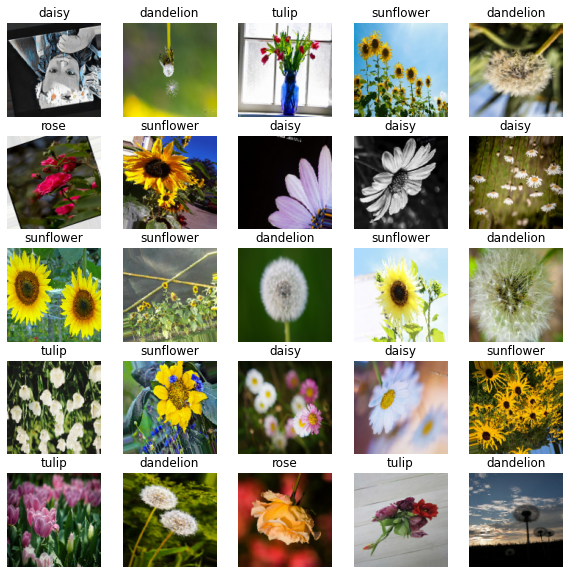

In [8]:
plt.figure(figsize=(10,10))
img, label = train_ds.next()
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(img[i])
    plt.axis('off')
    plt.title(classes[np.argmax(label[i,:])])
    
# ponieważ labele są w formacie [0,0,1,0,0], poleceniem argmax sprawdzamy, na którym miejscu
# jest jedynka. W powyższym przykładzie na pozycji 2. Oznacza to, że taki label wskazuje 
# na "rose".
# classes[np.argmax(label[i,:])] ->
# classes[np.argmax([0,0,1,0,0])] ->
# classes[2] -> "rose"

    

In [ ]:
# Stwórz dwa modele.  
# Pierwszy bez augumentacji - dane należy wczytać na nowo.  Drugi z augumentacją i z 
# wykorzystaniem danych wczytanych u góry. Stwórz wykresy dla obu i porównaj.
# W pierwszym modelu dostosuj liczbę warstw maksymalizując accuracy. Następnie dla
# dokładnie takiego samego modelu powtórz te czynności, wykorzystując dane z augumentacją.

In [13]:
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras import Sequential

model = Sequential()
model.add(Conv2D(filters = 10, kernel_size = (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters = 6, kernel_size = (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))
# trzeba pamiętać żeby zmieniać dense!

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 10)      280       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 6)         546       
                                                                 
 flatten_1 (Flatten)         (None, 22326)             0         
                                                                 
 dense_3 (Dense)             (None, 1024)              22862848  
                                                                 
 dense_4 (Dense)             (None, 256)               262400    
                                                      

In [14]:
history = model.fit(train_ds, epochs = EPOCHS, validation_data=(valid_ds), callbacks = [es])

Epoch 1/100
109/109 [==============================] - 59s 529ms/step - loss: 2.4506 - accuracy: 0.3665 - val_loss: 1.3512 - val_accuracy: 0.3953
Epoch 2/100
109/109 [==============================] - 53s 486ms/step - loss: 1.2439 - accuracy: 0.4825 - val_loss: 1.1880 - val_accuracy: 0.5314
Epoch 3/100
109/109 [==============================] - 54s 498ms/step - loss: 1.1154 - accuracy: 0.5632 - val_loss: 1.1089 - val_accuracy: 0.5570
Epoch 4/100
109/109 [==============================] - 53s 488ms/step - loss: 1.0319 - accuracy: 0.5924 - val_loss: 1.1528 - val_accuracy: 0.5593
Epoch 5/100
109/109 [==============================] - 52s 473ms/step - loss: 1.0217 - accuracy: 0.5970 - val_loss: 1.3449 - val_accuracy: 0.4767
Epoch 6/100
109/109 [==============================] - 51s 471ms/step - loss: 0.9903 - accuracy: 0.6112 - val_loss: 1.1001 - val_accuracy: 0.5430
Epoch 7/100
109/109 [==============================] - 51s 470ms/step - loss: 0.9591 - accuracy: 0.6083 - val_loss: 1.0708 -

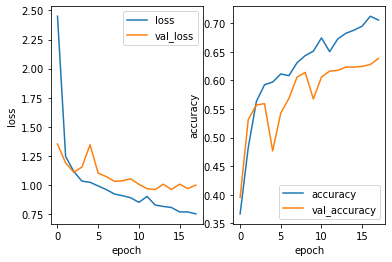

In [15]:
#wyświetl wykresy uczenia
hist = pd.DataFrame(history.history)

plt.subplot(1, 2, 1)
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.accuracy, label = "accuracy")
plt.plot(hist.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")


plt.legend()

In [17]:
img, label = valid_ds.next()
y_pred = model.predict(img)

1/1 [==============================] - 0s 116ms/step


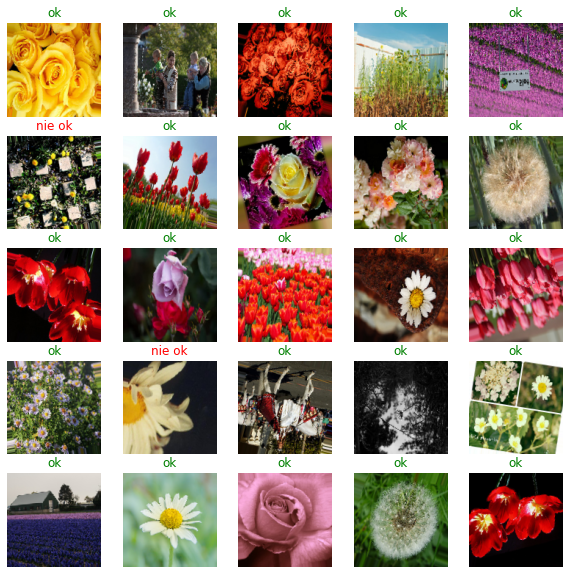

In [18]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(img[i])
    plt.axis('off')
    if np.round(y_pred[i])[0] == label[i][0]:
        plt.title("ok", color = 'green')
    else:
        plt.title("nie ok", color = 'red')    

bez augumentacji:

In [19]:
from keras.preprocessing.image import ImageDataGenerator

root_path = "flowers/"

gen_z = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)
# dodatkowe parametry które on "może" zrobić po to aby uniknąć przeuczenia.


# Load Data
train_dts = gen_z.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes = os.listdir(root_path), #klasy nazwij tak, jak nazywają się foldery w folderze flowers
    shuffle=True,
    batch_size=32,
    target_size=(128,128),
    subset="training"
)

valid_dts = gen_z.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes = os.listdir(root_path),
    shuffle=True,
    batch_size=32,
    target_size=(128,128),
    subset="validation"
)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [20]:
classes = os.listdir(root_path) #stwórz listę, w której będą nazwy klas. Stwórz ją na podstawie nazw folderów

In [21]:
classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [22]:
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras import Sequential

moodel = Sequential()
moodel.add(Conv2D(filters = 10, kernel_size = (3, 3), activation='relu', input_shape=(128, 128, 3)))
moodel.add(MaxPooling2D((2, 2)))
moodel.add(Conv2D(filters = 6, kernel_size = (3, 3), activation='relu', input_shape=(128, 128, 3)))
moodel.add(Flatten())
moodel.add(Dense(1024, activation='relu'))
moodel.add(Dense(256, activation='relu'))
moodel.add(Dense(5, activation='softmax'))
# trzeba pamiętać żeby zmieniać dense!

moodel.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

moodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 6)         546       
                                                                 
 flatten_2 (Flatten)         (None, 22326)             0         
                                                                 
 dense_6 (Dense)             (None, 1024)              22862848  
                                                                 
 dense_7 (Dense)             (None, 256)               262400    
                                                      

In [23]:
history = moodel.fit(train_dts, epochs = EPOCHS, validation_data=(valid_dts), callbacks = [es])

Epoch 1/100
109/109 [==============================] - 50s 448ms/step - loss: 1.7357 - accuracy: 0.3437 - val_loss: 1.3328 - val_accuracy: 0.4267
Epoch 2/100
109/109 [==============================] - 49s 446ms/step - loss: 1.0675 - accuracy: 0.5916 - val_loss: 1.2223 - val_accuracy: 0.5000
Epoch 3/100
109/109 [==============================] - 49s 449ms/step - loss: 0.5933 - accuracy: 0.7848 - val_loss: 1.3385 - val_accuracy: 0.5047
Epoch 4/100
109/109 [==============================] - 49s 446ms/step - loss: 0.2783 - accuracy: 0.9083 - val_loss: 1.7660 - val_accuracy: 0.4814
Epoch 5/100
109/109 [==============================] - 48s 445ms/step - loss: 0.1175 - accuracy: 0.9679 - val_loss: 2.2119 - val_accuracy: 0.4651
Epoch 6/100
109/109 [==============================] - 49s 445ms/step - loss: 0.0563 - accuracy: 0.9876 - val_loss: 2.4972 - val_accuracy: 0.4907
Epoch 7/100
109/109 [==============================] - 49s 445ms/step - loss: 0.0227 - accuracy: 0.9957 - val_loss: 2.4560 -